In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 13s - 45ms/step - accuracy: 0.8713 - loss: 0.4096 - val_accuracy: 0.9756 - val_loss: 0.0828
Epoch 2/10
300/300 - 11s - 38ms/step - accuracy: 0.9614 - loss: 0.1308 - val_accuracy: 0.9822 - val_loss: 0.0549
Epoch 3/10
300/300 - 11s - 36ms/step - accuracy: 0.9697 - loss: 0.0991 - val_accuracy: 0.9878 - val_loss: 0.0393
Epoch 4/10
300/300 - 11s - 36ms/step - accuracy: 0.9749 - loss: 0.0831 - val_accuracy: 0.9880 - val_loss: 0.0350
Epoch 5/10
300/300 - 11s - 36ms/step - accuracy: 0.9780 - loss: 0.0717 - val_accuracy: 0.9890 - val_loss: 0.0323
Epoch 6/10
300/300 - 11s - 38ms/step - accuracy: 0.9810 - loss: 0.0632 - val_accuracy: 0.9893 - val_loss: 0.0294
Epoch 7/10
300/300 - 11s - 37ms/step - accuracy: 0.9819 - loss: 0.0589 - val_accuracy: 0.9896 - val_loss: 0.0289
Epoch 8/10
300/300 - 11s - 36ms/step - accuracy: 0.9836 - loss: 0.0518 - val_accuracy: 0.9918 - val_loss: 0.0249
Epoch 9/10
300/300 - 11s - 36ms/step - accuracy: 0.9855 - loss: 0.0482 - val_accuracy: 0.9917 - 

In [10]:
model.save('mnist_cnn.h5')

In [11]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy: {scores[1]*100:.2f}%")

Test accuracy: 99.23%


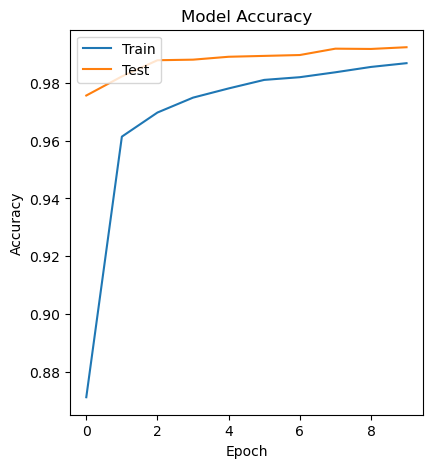

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

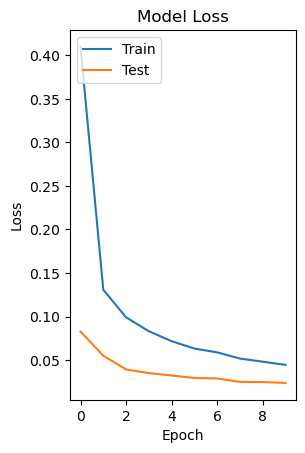

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [14]:
pred_labels = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


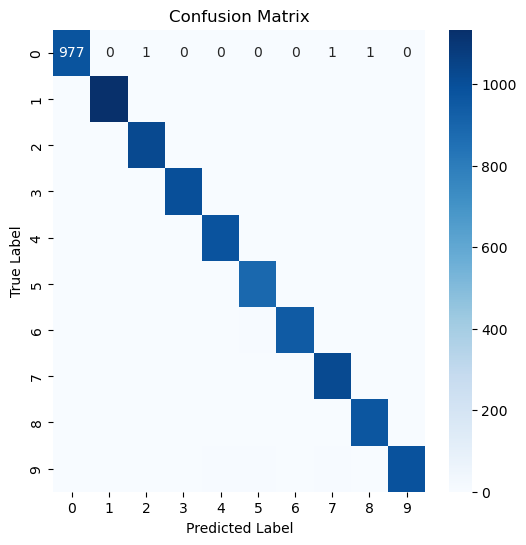

In [23]:
conf_matrix = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

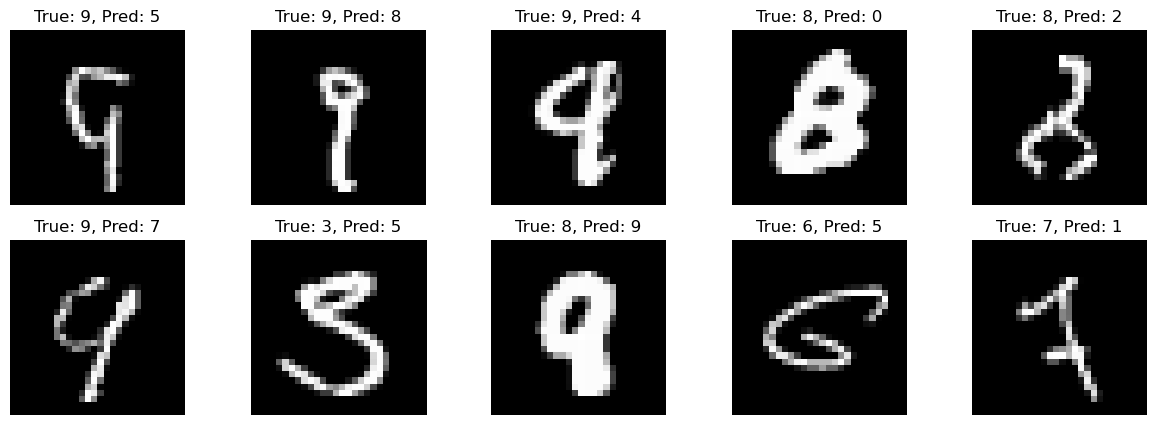

In [16]:
misclassified_indices = np.where(pred_labels != true_labels)[0]
plt.figure(figsize=(15, 5))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[index]}, Pred: {pred_labels[index]}")
    plt.axis('off')
plt.show()